# From Files to texts to nltk.Text

In the beginning of the first chapter of _[Natural Language Processing with Python](https://www.nltk.org/book/ch01.html)_, the authors have you download and import a number of prepared texts, which the rest of the chapter then uses. We already have a text, so this notebook starts off by importing the `nltk` library and then making it into the particular kind of *Text* that many `nltk` operations expect. For now, simply run the code in the first cell and let it set up Richard Connell's "The Most Dangerous Game" as well as Joseph Conrad's _Heart of Darkness_ as two text objects you can then explore.

This notebook is designed to allow you to explore the first section of the first chapter, "Computing with Language: Texts and Words" in the NLTK book.

As always, the first thing we do is import and load.

Here we are importing the NLTK and then loading two texts, Richard Connell's "The Most Dangerous Game" and Joseph Conrad's _Heart of Darkness_. (Conrad's novel was published in 1899, but it features a very similar plot: the protagonist white man encounters another man who has seemingly lost his connection with civilization. (There is a lot to be said about the whiteness that runs through both texts, but that is for a different class.)

## A Note about Pythonic Code and Research Notebooks

As you work through these materials, try to practice two things: using markdown cells like this one to narrate what you are doing and then `# comments` in your code that describe what a line (or cluster of lines) do. For those still or somewhat new to Python, it's a language that "likes" white space and many pythonistas prefer things more vertical than horizontal.

That is, you could write a line of code like below, but it is more difficult to read than the vertically organized code you see elsewhere in this notebook.

```python
hod = nltk.Text(nltk.tokenize.word_tokenize(open('../data/hod.txt', 'r').read()))
```

For our purposes, codes that is easier to read is better than code that is more compact. We are using code to *explore* human language and not (yet) building any kind of infrastructure where efficiency and compactness are more important than legibility and reproducibility.

Another reason to write vertical code is that Python will often locate an error by line. If there is a lot happening on one line, it's harder to know what broke. If it's only one thing, then you know it's that thing which is broken.

## Recursion to Words, er, Tokens

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alex\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [5]:
# Imports
import nltk

from nltk.tokenize import PunktSentenceTokenizer

# Open and read the file with utf-8 encoding to handle special characters
with open(r"C:\Users\alex\code\ENGL370-2025\ENGL370-2025\Garcia\The_Art_of_War.txt", mode="r", encoding="utf-8") as f:
    my_string = f.read()

# Manually import the Punkt tokenizer
tokenizer = PunktSentenceTokenizer()

# Tokenize the sentences
warSentences = tokenizer.tokenize(my_string)

# Let's see some results:
for sentence in warSentences[0:10]:
    print(sentence)


﻿The Project Gutenberg eBook of The Art of War

    

This ebook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever.
You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this ebook or online

at www.gutenberg.org.
If you are not located in the United States,

you will have to check the laws of the country where you are located

before using this eBook.
Title: The Art of War



Author: active 6th century B.C.
Sunzi



Translator: Lionel Giles



Release date: May 1, 1994 [eBook #132]

                Most recently updated: October 29, 2024



Language: English



Original publication: , 1910





*** START OF THE PROJECT GUTENBERG EBOOK THE ART OF WAR ***

Sun Tzŭ

on

The Art of War



THE OLDEST MILITARY TREATISE IN THE WORLD

Translated from the Chinese with Introduction and Critical Notes



BY

LIONEL GILES, M.A.
Assistant in the Depart

In [6]:
# And now testing out word tokenizing:
war_tokens = nltk.tokenize.word_tokenize(my_string)

# With the usual check:
for word in war_tokens[0:5]:
    print(word)

﻿The
Project
Gutenberg
eBook
of


It is important to note that we are not getting just words, we are getting whatever our code tells Python is a sub-string we can shove into a list. That is why the double back ticks are showing up in our list. 

The NLTK's `word_tokenize()` function may or may not align with what you think should be included: that is why it is important to be able to tokenize as you think is appropriate.

With the basics of tokenization out of the way, let's take a look at how we might count words from within the NLTK. 

To do this, we are going to use some built-in functionality, frequency distribution, called via `FreqDist()`. Note how we still iterate through out string using a `for` loop. As we did when we created our own dictionary of terms, first we create an empty container and then we fill it. This first time around we do it by sentence.

**Note**: I have used a very clear naming convention for my variables (objects).

In [7]:
# import nltk
from nltk.tokenize import word_tokenize

# Ensure 'punkt' is downloaded
# nltk.download('punkt', quiet=True)

# Open and read the file with utf-8 encoding to handle special characters
with open(r"C:\Users\alex\code\ENGL370-2025\ENGL370-2025\Garcia\The_Art_of_War.txt", mode="r", encoding="utf-8") as f:
    mdg_string = f.read()

# Create the object
mdg_fd = nltk.FreqDist()

# Manually import the Punkt tokenizer
tokenizer = PunktSentenceTokenizer()

# Populate the object
for sentence in tokenizer.tokenize(mdg_string):
    for word in word_tokenize(sentence):
        mdg_fd[word] += 1

# Let's see the count
print(len(mdg_fd))


7943


In [8]:
mdg_fd.most_common(10)

[(',', 3712),
 ('the', 3485),
 ('.', 3318),
 ('of', 2130),
 ('to', 1692),
 ('and', 1467),
 ('in', 1096),
 ('a', 1008),
 ('’', 994),
 ('is', 963)]

It looks like the difference of 90 tokens can somewhat be explained by punctuation and, and this is a guess, capitalization. (Remember, when we created our dictionary of tokens, we not only dropped all non-letter characters, save the apostrophe, but we also normalized to all lowercase.

In [9]:
mdg_fd_alt = nltk.FreqDist()
for word in nltk.tokenize.word_tokenize(mdg_string.lower()):
        mdg_fd_alt[word] += 1

# Let's see what the count is now:
len(mdg_fd_alt)

7408

*Oh! Now we have dropped below our earlier count!*

Repeat after me: tokenization depends on the analyst preferences. The only thing that really matters here is you have some explanation for why you are tokenizing in this fashion and that you use the same method across your entire set of texts, or *corpus*.

We can subtract the difference between the using sets. (See, you can math language.)

In [10]:
mdg_diff = set(mdg_fd) - set(mdg_fd_alt)

print(mdg_diff)

{'_Ssu', 'Chuang', 'Yu-chang', 'Make', 'Mo', 'I', 'Whenever', 'Trafalgar', 'TREATISE', 'Alas', 'Omissions', 'Mafeking', 'Science', '_T', 'WEAK', 'Though', 'Shou-chieh', 'THOSE', 'While', 'South', 'Feng', 'Twenty-eight', 'Caesar', 'Nicias', 'Just', 'Manœuvering', '656', 'Hsiang', '_P', 'Five', 'Commentators', 'Other', '_Chan', 'Sonshi', '1.E.3', 'going—Not', 'Hsia', 'Making', 'Ju-nan', 'INCLUDING', 'Kuang', 'CH', 'Te', 'And', 'Feign', 'Many', 'ASCII', 'TO', 'Chien-te', 'Movement', '1.E.9', 'When', 'Danger', 'Disciplined', 'Commentary', 'Casilinum', 'X', 'Wen-su', 'GILES', 'NEGLIGENCE', 'Tsu', '_Shih', 'REFUND', 'Su', 'Hsin-', '_Liu', 'Homeric', 'MERCHANTABILITY', 'Fire', 'Fa_', 'Pensees', 'Gutenberg', 'UAN', 'Giles', '\ufeffThe', 'IV', 'POINTS', 'Military', 'Generals', 'eBook', 'Kung-sun', 'IN', 'Owing', 'Chih', 'Sometimes', 'Burn', 'Weak', 'CONTRACT', 'THE', 'INTRODUCTION', 'Accordingly', 'Heaven', 'Like', 'Ping', 'Peking', 'Kuang-pi', 'Facing', 'Fabius', 'Needless', '_Yu', 'Country', 

If you ask Python what kind of data structure freq_dist is, you'll get a rather unhelpful response, but look at the output of `mdg_fd.most_common(10)` again (above). What does it look like?

In [13]:
# Let's see what kind of data structure this is:
print(type(mdg_fd))

# What's it look like inside?
for i in mdg_fd[0:5]:
    print(i)

<class 'nltk.probability.FreqDist'>


TypeError: unhashable type: 'slice'

In [14]:
# Treating freqdist as a tuple
# And using f-strings to make it easy to print our results
for word, frequency in mdg_fd.most_common(10):
    print(f"{word} :  {frequency}")

, :  3712
the :  3485
. :  3318
of :  2130
to :  1692
and :  1467
in :  1096
a :  1008
’ :  994
is :  963


In [15]:
# The built-in way to do this:
# for token in mdg_fd:
#    print(token, ',', mdg_fd[token], '\n')

# If you run the above you will get a LOOOONNNG list.
# So we are going to go for the shorter version:
for token in mdg_fd.most_common(5):
    print(f"{token}, {mdg_fd[token]}")

(',', 3712), 0
('the', 3485), 0
('.', 3318), 0
('of', 2130), 0
('to', 1692), 0


#The code above exposes functionality we can use, namely `mdg_fd[token]`. Let's try it out with a word we know is in our text.

In [16]:
#change the word to Victory

mdg_fd["Victory"]

5

That suggests that we could develop a list of words (tokens!) in which we are interested and get back their counts.

In [17]:
# First, a list of words: I changed this for victory
words = ["Victory", "Victor", "Victories"]

# Now to try out our functinality:
for word in words:
    print(word, ",", mdg_fd[word])

Victory , 5
Victor , 0
Victories , 0


This does seem rather repetitive, since we had to include 5 different forms of the same word. There is a way to reduce words to their *lemma*s, and we will explore that a little later in the course.

<Axes: xlabel='Samples', ylabel='Counts'>

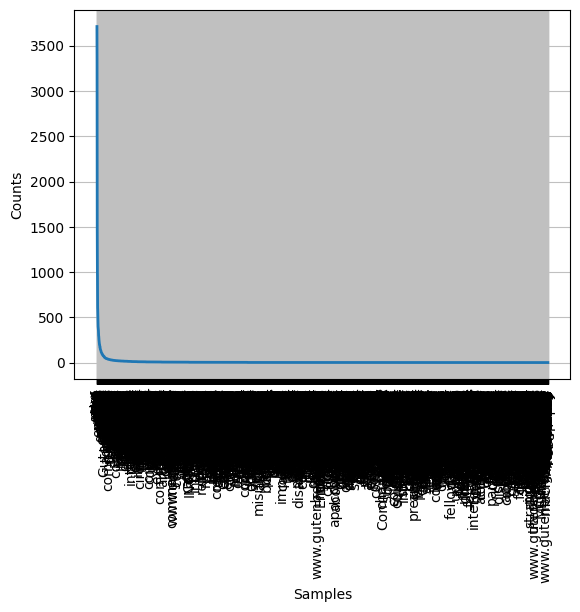

In [18]:
# freq_dist comes with a lot of functionality
# (See Table 3.1 in Chapter 1 of the NLTK book for more ideas.)
mdg_fd.plot()

## Creating and Working with an NLTK `Text`

You can do more than simply count words, though as we will see over the next few modules there is a lot you can do with frequencies. *A lot.* You can also look at where words occur in a text, both locally and globally. We will start with locals, using something called *Key Word in Context* (aka KWiC), which the NLTK makes available through the `concordance` function.

In [30]:
# First, we re-create our token list
# and we include lowercasing our text
# And now testing out word tokenizing:
war_tokens = nltk.tokenize.word_tokenize(mdg_string.lower())

# Now we create our Text object
warSentences = nltk.Text(war_tokens)

In [31]:
mdg_text.concordance("soldiers")

Displaying 25 of 72 matches:
y I submit your theory of managing soldiers to a slight test ? '' Sun Tzŭ repl
f his orders _are_ clear , and the soldiers nevertheless disobey , then it is 
enger to the King saying : `` Your soldiers , Sire , are now properly drilled 
s time onward , a number of famous soldiers arose , one after the other : Kao-
hough according to my estimate the soldiers of Yüeh exceed our own in number ,
 be marching an army , or handling soldiers , or estimating the enemy , or con
, and a hundred thousand mail-clad soldiers , [ The `` swift chariots '' were 
are necessary in order to make the soldiers see the advantage of beating the e
njunction with ours . The captured soldiers should be kindly treated and kept 
 This shakes the confidence of the soldiers . [ I follow Mei Yao-ch ’ en here 
arrived . The analogous quality in soldiers is the highly important one of bei
d horses , and only allowed infirm soldiers and emaciated cattle to be seen . 
al is lacking in capaci

In [22]:
mdg_text.similar("soldiers")

army men time people passage officers troops forces enemy chinese work
they field commentators plans tactics words we end chapters


**Note**: The authors introduce `concordance`, `similar`, `common_context`, `dispersion_plot`, and `generate` in this section. When you get to the dispersion plot, please note that, as the authors warn, you have to have other Python libraries installed for it to work i.e., `matplotlib`). 

Try moving back and forth between concordance and dispersion to see how much you can narrow in on the meaning of "The Most Dangerous Game" through finding the contexts / placement of 4-6 "key words." (Oh how the notion of "key" is going to haunt us!)

In [35]:
warSentences.concordance("world")

Displaying 8 of 8 matches:
d states and most other parts of the world at no cost and with almost no restri
 the oldest military treatise in the world translated from the chinese with int
ince it took the start of the second world war to renew interest in his work . 
fore the _shih chi_ was given to the world . liu hsiang ( 80-9 b.c . ) says : `
 greatest military geniuses that the world has seen , and napoleonic in the sca
s approbation for things that '' the world ’ s coarse thumb and finger fail to 
es that have not come to light , the world as large knows nothing of them , and
d states and most other parts of the world at no cost and with almost no restri


In [37]:
warSentences.similar("attack")

be use make victory fight the on defeat enemy defend of it give
chinese march words him people ch them


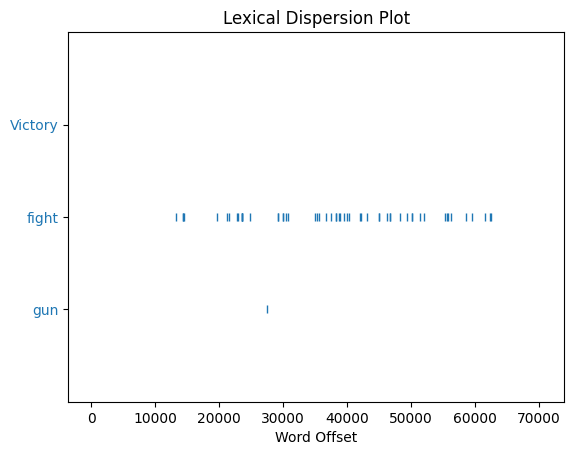

In [38]:
warSentences.dispersion_plot(["Victory", "fight", "gun"])

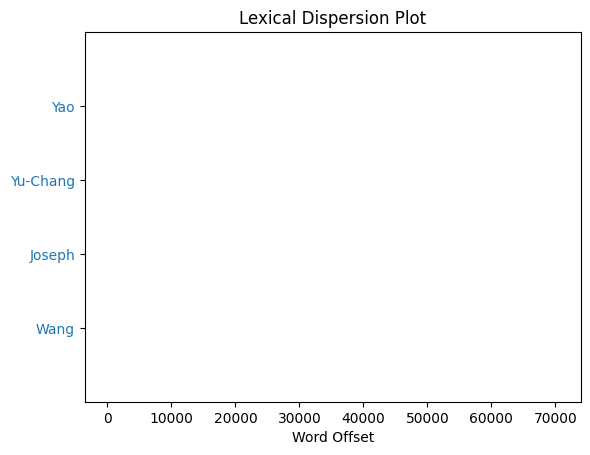

In [40]:
# We can also create our list in advance:
characters = ["Yao", "Yu-Chang", "Joseph", "Wang"]

# And then feed the list to the function:
warSentences.dispersion_plot(characters)

So, it would appear that the nltk.Text knows something about the contexts within which words occur. That is, it has some sense of what words go with other words: that is how it calcuate similarity and common contexts. Does that mean we can also use that "knowledge" generatively?

In [41]:
mdg_text.generate()

Building ngram index...


interesting , perhaps , but only mentions five , namely : `` Abide not
in existence , a spirit of sympathetic cooperation . , secretly spying
out our weaknesses and overhearing our instructions . '' achieved by
man , his account would be divided amongst your men have any regular
routine . '' 26 . then he will weaken his right ; should he strengthen
his van ; should he strengthen his van , he might escape , actually
made a deep and lasting impression on all sides , and took care that
they are at once set off with


"interesting , perhaps , but only mentions five , namely : `` Abide not\nin existence , a spirit of sympathetic cooperation . , secretly spying\nout our weaknesses and overhearing our instructions . '' achieved by\nman , his account would be divided amongst your men have any regular\nroutine . '' 26 . then he will weaken his right ; should he strengthen\nhis van ; should he strengthen his van , he might escape , actually\nmade a deep and lasting impression on all sides , and took care that\nthey are at once set off with"

## Comparing Texts

Hold for now.

In [ ]:
# Create a list of substrings, aka words
mdg_tokens = nltk.tokenize.word_tokenize(mdg_string.lower())

# Create the NLTK Text object
mdgText = nltk.Text(mdg_words)

# Repeat the 3 steps for "Heart of Darkness"
with open("../data/hod.txt", mode="r") as f:
    hod_string = f.read()
    
hod_words = nltk.tokenize.word_tokenize(hod_string.lower())

hodText = nltk.Text(hod_words)

# Check our output and compare lengths
print(len(mdg), len(hod))

We have a long-ish short story of almost ten thousand words, and short-ish novel of forty-six thousand words. How can we go about comparing them? 

One place to start is to get a sense of the total number of unique words. For that we are going to use Python `set()` function.

In [ ]:
# This is a long list:
print(len(set(mdg)), len(set(hod)))

If we do the math, _Heart of Darkness_, which is four and a half time longer than "The Most Dangerous Game," only uses three times the number of words. Interesting. Let's store that information away for further exploration. 

In [ ]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv


In [ ]:
lex_div(mdg)

In [ ]:
lex_div(hod)

In [ ]:
len(set(hod))/len(set(mdg))